In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
univ = [
    # --- TECHNOLOGY ---
    'MSFT', 'AAPL', 'INTC', 'CSCO', 'ORCL', 'IBM', 'ADBE', 'TXN', 'NVDA', 'QCOM',
    'AMAT', 'ADI', 'MU', 'LRCX', 'KLAC', 'AMD', 'APH', 'GLW', 'HPQ', 'MSI',
    'ADP', 'PAYX', 'FISV', 'FIS', 'CTSH', 'INTU', 'ADSK', 'SNPS', 'CDNS', 'MCHP',
    'STM', 'UMC', 'TSM', 'ASX', 'TEL', 'TER', 'NTAP', 'STX', 'WDC', 'ZBRA',
    'TRMB', 'TYL', 'AKAM', 'VRSN',

    # --- HEALTHCARE ---
    'JNJ', 'PFE', 'MRK', 'LLY', 'UNH', 'ABT', 'BMY', 'AMGN', 'GILD', 'BIIB',
    'SYK', 'MDT', 'BAX', 'BDX', 'CVS', 'CI', 'HUM', 'MCK', 'CAH', 'LH',
    'TMO', 'DHR', 'ISRG', 'EW', 'BSX', 'ZBH', 'STE', 'COO', 'HOLX', 'XRAY',
    'DGX', 'CNC', 'MOH', 'A', 'MTD', 'WAT', 'TECH', 'BIO',
    'RGEN', 'VRTX', 'REGN', 'INCY',

    # --- FINANCIALS ---
    'JPM', 'BAC', 'WFC', 'C', 'AXP', 'GS', 'MS', 'USB', 'BK', 'STT',
    'PGR', 'ALL', 'AIG', 'HIG', 'TRV', 'MMC', 'AON', 'BEN', 'SCHW', 'MCO',
    'SPGI', 'PNC', 'TFC', 'KEY', 'FITB', 'MTB', 'HBAN', 'RF', 'CMA', 'ZION',
    'L', 'CINF', 'WRB', 'AFL', 'PRU', 'MET', 'PFG', 'LNC', 'UNM',
    'RJF', 'SEIC', 'TROW', 'IVZ', 'AMG', 'BLK', 'ICE', 'CME', 'NDAQ', 'JKHY',
    'BRO', 'AJG', 'WTM', 'FAF',

    # --- CONSUMER STAPLES ---
    'KO', 'PEP', 'PG', 'WMT', 'COST', 'CL', 'MO', 'SYY', 'K', 'GIS',
    'HSY', 'CLX', 'MKC', 'TSN', 'CAG', 'TAP', 'EL', 'ADM', 'HRL', 'SJM',
    'KMB', 'CPB', 'SBUX', 'KR', 'DG', 'DLTR', 'TGT',
    'CHD', 'STZ', 'BF-B', 'NWL',

    # --- CONSUMER DISCRETIONARY ---
    'HD', 'LOW', 'MCD', 'NKE', 'F', 'DIS', 'TJX', 'VFC', 'YUM', 'DRI',
    'CMG', 'MAR', 'HLT', 'CCL', 'RCL', 'HAS', 'MAT', 'BBY', 'GPC',
    'AZO', 'ORLY', 'KMX', 'ROST', 'LB', 'M', 'KSS', 'DDS',
    'LEG', 'MHK', 'WHR', 'LEN', 'PHM',

    # --- INDUSTRIALS ---
    'GE', 'BA', 'CAT', 'HON', 'LMT', 'RTX', 'GD', 'MMM', 'UNP', 'FDX',
    'UPS', 'DE', 'EMR', 'ITW', 'ETN', 'PH', 'DOV', 'CMI', 'PCAR', 'NSC',
    'CSX', 'GWW', 'FAST', 'VMI', 'RSG', 'WM', 'CTAS', 'GPN', 'EFX', 'JCI',
    'TXT', 'NOC', 'LHX', 'HII', 'TDG', 'AME', 'ROK', 'SWK', 'SNA', 'MAS',

    # --- ENERGY & MATERIALS ---
    'XOM', 'CVX', 'COP', 'SLB', 'HAL', 'VLO', 'OXY', 'DVN',
    'EOG', 'APA', 'BKR', 'NEM', 'FCX', 'APD', 'ECL', 'SHW', 'PPG',
    'LYB', 'DOW', 'DD', 'IP', 'NUE',

    # --- UTILITIES ---
    'NEE', 'DUK', 'SO', 'AEP', 'ED', 'PEG', 'XEL', 'EIX', 'ETR', 'D',
    'WEC', 'ES', 'AWK', 'SRE', 'FE', 'CMS', 'DTE', 'PPL', 'CNP', 'NI',

    # --- REAL ESTATE ---
    'PLD', 'SPG', 'PSA', 'O', 'VTR', 'BXP', 'AVB', 'EQR', 'ESS',
    'MAA', 'UDR', 'HST', 'VNO', 'SLG'
]

In [3]:
# Download Data
# raw_data = yf.download(tickers=univ,
#                          start='2020-01-02',
#                          interval='1d',
#                          auto_adjust=True)
# raw_data[['Close', 'Volume']].to_pickle('price_volume_data.pkl')

price_volume_data = pd.read_pickle('price_volume_data.pkl')
price_data = price_volume_data['Close'].ffill()
rets = price_data.pct_change()

In [4]:
def PCA_process(rets_PCA, num_factors):

    # Construct empirical correlation matrix
    corr_matrix = rets_PCA.corr()

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]
    eigenvectors = pd.DataFrame(eigenvectors,
                                index=rets_PCA.columns,
                                columns=np.arange(1, len(eigenvalues) + 1))

    # Calculate percentage of variance explained by each factor
    variance_pct = eigenvalues / np.sum(eigenvalues)

    # For now focusing on 15 Factor model so num_factors=15, but can be adjusted for variable number by reaching a threshold of variance explained

    # Calculate weights & factor returns for eigenportfolio
    std = rets_PCA.std()
    eigenvectors_selected = eigenvectors.loc[:, 1:num_factors]
    eigen_weights = eigenvectors_selected.div(std, axis=0)

    return eigen_weights, variance_pct

In [5]:
def OLS_residuals(rets_window, eigenportfolio_rets, window_OU):

    # Vectorized OLS for residual calculation
    F = eigenportfolio_rets.tail(window_OU)
    F.insert(0, 0, 1)
    R = rets_window.tail(window_OU)

    # Calculate the beta coefficients (weight of each factor)
    # beta_values = np.linalg.solve(F.T @ F,
    #                               F.T @ R.values)
    beta_values = np.linalg.inv(F.T @ F) @ F.T @ R
    # beta_values, residuals, rank, s = np.linalg.lstsq(F, R, rcond=None)
    beta = pd.DataFrame(beta_values,
                        index=F.columns,
                        columns=R.columns)
    
    # Calculate residuals
    residuals = R.values - (F @ beta_values)
    residuals = pd.DataFrame(residuals, index=R.index, columns=R.columns)
    cum_residuals = residuals.cumsum()
    
    return cum_residuals, beta

In [6]:
def OU_process(cum_residuals):

    # Calculate OU parameters (1-lag regression model)
    X = cum_residuals.iloc[:-1, :]
    Y = cum_residuals.iloc[1:, :]

    # Univariate approach to calculate OU parameters
    numerator = ((X - X.mean(axis=0)).values * (Y - Y.mean(axis=0)).values).sum(axis=0)
    denominator = ((X - X.mean(axis=0))**2).sum(axis=0)

    # Calculate a and b values (mask for invalid b values)
    b = numerator / denominator
    mask = (b >= 1) | (b <= 0)
    b[mask] = 0.1
    a = Y.mean(axis=0) - (b * X.mean(axis=0))

    # Calculate zeta residuals (mask for invalid b values)
    zeta = Y.values - (a.values + b.values * X.values)
    zeta = pd.DataFrame(zeta,
                        index=Y.index,
                        columns=Y.columns)
    zeta.loc[:, mask] = 0

    # Calculate rest of OU metrics
    m = a / (1 - b)
    centered_m = m - m.mean()
    kappa = -np.log(b) * 252
    sigma_eq = zeta.std(ddof=1) / np.sqrt(1 - b**2)
    # s_score = -centered_m / sigma_eq # Assumes that cum_residuals of the last day is zero
    s_score = (cum_residuals.iloc[-1] - centered_m) / sigma_eq # Out-of-sample s_score

    # Mask OU metrics for invalid b values
    kappa[mask] = 0
    sigma_eq[mask] = 0
    s_score[mask] = 0

    return s_score, kappa, sigma_eq

In [7]:
def signal_gen(rets, start_trading_date, window_PCA, window_OU, num_factors):
    
    # Select trading dates
    days = 0
    Dates = rets.index[rets.index >= start_trading_date]

    # Initialize DataFrames to store OU metrics
    Factor_rets = pd.DataFrame(index=Dates, columns=range(1, num_factors + 1), dtype=float)
    S_score = pd.DataFrame(index=Dates, columns=rets.columns, dtype=float)
    Kappa = pd.DataFrame(index=Dates, columns=rets.columns, dtype=float)
    Sigma_eq = pd.DataFrame(index=Dates, columns=rets.columns, dtype=float)
    Beta = {}

    for date in Dates:

        # Select the relevant window of returns
        # rets_window = rets.loc[:date].tail(window_PCA)
        rets_window = rets.loc[:date].iloc[:-1].tail(window_PCA) # no lookahead bias (exclude current day)

        # Calculate PCA weights every 30 days
        if days % 30 == 0:
            # Filter for valid tickers
            nan_count = rets_window.isna().sum()
            mask = nan_count == 0
            valid_columns = rets_window.columns[mask]
            rets_window = rets_window[valid_columns].fillna(0)

            # Calculate PCA weights
            eigen_weights, variance_pct = PCA_process(rets_PCA=rets_window,
                                                      num_factors=num_factors)
        else:
            rets_window = rets_window[valid_columns].fillna(0)

        # Calculate OU parameters every day
        eigenportfolio_rets = rets_window @ eigen_weights

        # Save the Factor Returns for current day
        current_ret = rets.loc[date, valid_columns].fillna(0)
        Factor_rets.loc[date] = current_ret @ eigen_weights

        cum_residuals, beta = OLS_residuals(rets_window,
                                            eigenportfolio_rets,
                                            window_OU)
        s_score, kappa, sigma_eq = OU_process(cum_residuals)

        # Store OU metrics
        S_score.loc[date, valid_columns] = s_score
        Kappa.loc[date, valid_columns] = kappa
        Sigma_eq.loc[date, valid_columns] = sigma_eq
        Beta[date] = beta

        # Update time counter
        days += 1
        if days % 300 == 0:
            print(f'Processed {days} days')
        elif date == Dates[-1]:
            print(f'Processed {days} days')
            print('Processing complete.')
    
    return S_score, Kappa, Sigma_eq, Beta, Factor_rets

In [8]:
window_PCA = 252
window_OU = 60
start_trading_date = '2021-01-28'
num_factors = 5

S_score, Kappa, Sigma_eq, Beta, Factor_rets = signal_gen(rets, start_trading_date, window_PCA, window_OU, num_factors)

Processed 300 days
Processed 600 days
Processed 900 days
Processed 1200 days
Processed 1243 days
Processing complete.


In [9]:
def gen_positions(S_score, Kappa, Sigma_eq, leverage):
    days = 0
    Dates = S_score.index
    
    # Initialize State Tracker (0 = Flat, 1 = Long, -1 = Short)
    current_state = pd.Series(0, index=S_score.columns)
    
    # Store history
    state_history = pd.DataFrame(index=S_score.index, columns=S_score.columns)
    weight_history = pd.DataFrame(index=S_score.index, columns=S_score.columns)

    # Parameters
    ENTRY_LONG = -2.0
    ENTRY_SHORT = 2.0
    EXIT_SHORT = 0.5
    EXIT_LONG = -0.5   
    STOP_LOSS = 3.0 
    MIN_KAPPA = 5.0    # Filter for fast mean reversion

    for date in Dates:
        s_score = S_score.loc[date]
        kappa = Kappa.loc[date]
        sigma_eq = Sigma_eq.loc[date]
        
        # --- 1. EXIT LOGIC ---
        exit_long = (current_state == 1) & ((s_score > EXIT_LONG) | (s_score < -STOP_LOSS))
        current_state[exit_long] = 0
        
        exit_short = (current_state == -1) & ((s_score < EXIT_SHORT) | (s_score > STOP_LOSS))
        current_state[exit_short] = 0

        # --- 2. ENTRY LOGIC ---
        # Handle potential NaNs in Kappa/Sigma to prevent errors
        valid_data = (kappa.notna()) & (sigma_eq > 0) & (kappa > MIN_KAPPA)
        
        # Enter Long
        enter_long = (current_state == 0) & (s_score < ENTRY_LONG) & valid_data
        current_state[enter_long] = 1
        
        # Enter Short
        enter_short = (current_state == 0) & (s_score > ENTRY_SHORT) & valid_data
        current_state[enter_short] = -1

        # --- 3. VOLATILITY WEIGHTING ---
        # Formula: Weight = Direction * (1 / Sigma)
        # We use a small epsilon (1e-6) to avoid division by zero if Sigma is 0
        raw_weights = current_state / (sigma_eq + 1e-6)
        
        # (Optional) Cap weights if Sigma is extremely small to prevent massive leverage
        raw_weights = raw_weights.clip(-2.0, 2.0) 

        # --- 4. RECORD HISTORY ---
        state_history.loc[date] = current_state
        weight_history.loc[date] = raw_weights

        # Update time counter
        days += 1
        if days % 300 == 0:
            print(f'Processed {days} days')
        elif date == Dates[-1]:
            print(f'Processed {days} days')
            print('Processing complete.')

    weight_history = weight_history.astype(float)

    # Normalize weights so we don't use infinite leverage
    gross_leverage = weight_history.abs().sum(axis=1)
    normalized_weights = weight_history.div(gross_leverage, axis=0).fillna(0)

    leveraged_weights = normalized_weights * leverage

    return state_history, leveraged_weights


In [10]:
def calculate_pnl(rets, Beta, Factor_rets, weight_history, commission=0.0005):
    
    Dates = weight_history.index
    effective_weights = weight_history.shift(1).fillna(0)

    # Align Returns with Weights
    aligned_rets = rets.loc[Dates]

    # Calculate strategy returns
    strat_rets = effective_weights * aligned_rets
    daily_strat_rets = strat_rets.sum(axis=1)

    # Calculate beta hedge returns
    hedge_rets = pd.DataFrame(index=Dates,
                              columns=weight_history.columns)
    for date in Dates:
        weights = effective_weights.loc[date]
        factor_rets = Factor_rets.loc[date]
        beta = Beta[date].iloc[1:, :]
        hedge_rets.loc[date] = (beta.T @ factor_rets) * weights
    daily_hedge_rets = hedge_rets.sum(axis=1)
    
    # Transaction costs
    weight_changes = weight_history.diff().abs().fillna(0)
    costs = weight_changes * commission
    daily_costs = costs.sum(axis=1)
    
    # Net Returns
    net_rets = strat_rets - hedge_rets - costs
    daily_net_rets = daily_strat_rets - daily_costs - daily_hedge_rets 
    
    # Cumulative Returns
    cum_rets = (1 + net_rets).cumprod()
    daily_cum_rets = (1 + daily_net_rets).cumprod()

    # return net_rets, cum_rets, strat_rets
    return cum_rets, daily_net_rets, daily_cum_rets

In [11]:
# def equity_curve(daily_cum_rets, daily_net_rets, plot=False):
#     daily_cum_rets = pd.to_numeric(daily_cum_rets, errors='coerce')

#     # Total return
#     total_ret = (daily_cum_rets.iloc[-1] - 1) * 100

#     # Sharpe ratio
#     sharpe = (daily_net_rets.mean() / daily_net_rets.std()) * np.sqrt(252)

#     if plot:
#         # Plot equity curve
#         plt.figure(figsize=(12,6))
#         plt.plot(daily_cum_rets.index,
#                 daily_cum_rets,
#                 color='blue',
#                 linewidth=2)
        
#         plt.title(f'Strategy Equity Curve | Total Return: {total_ret:.2f}% | Sharpe Ratio: {sharpe:.2f}')
#         plt.xlabel('Date')
#         plt.ylabel('Cumulative Returns')
#         plt.grid(True)
#         plt.show()
    
#     return total_ret, sharpe

In [12]:
# def drawdown_curve(daily_cum_rets, plot=False):
#     daily_cum_rets = pd.to_numeric(daily_cum_rets, errors='coerce')

#     # Drawdown calculation
#     running_max = daily_cum_rets.cummax()
#     drawdown = (daily_cum_rets / running_max) - 1
#     max_dd = drawdown.min() * 100

#     if plot:
#         # Plot drawdown curve
#         plt.figure(figsize=(12,6))
#         plt.plot(drawdown.index, drawdown, color='red', linewidth=2)
#         plt.fill_between(x=drawdown.index,
#                         y1=drawdown,
#                         y2=0,
#                         color='red',
#                         alpha=0.1)
#         plt.title(f'Strategy Drawdown Curve | Max Drawdown: {max_dd:.2f}%')
#         plt.xlabel('Date')
#         plt.ylabel('Drawdown')
#         plt.grid(True)
#         plt.show()

#     return max_dd

In [13]:
def performance_analysis(cum_rets, net_rets, plot_equity=False, plot_drawdown=False, show_stats=False):
    cum_rets = pd.to_numeric(cum_rets, errors='coerce')

    # EQUITY CURVE
    # Total return
    total_ret = (cum_rets.iloc[-1] - 1) * 100

    # Sharpe ratio
    sharpe = (net_rets.mean() / net_rets.std()) * np.sqrt(252)

    if plot_equity:
        # Plot equity curve
        plt.figure(figsize=(12,6))
        plt.plot(cum_rets.index, cum_rets, color='blue', linewidth=2)
        plt.title(f'Strategy Equity Curve | Total Return: {total_ret:.2f}% | Sharpe Ratio: {sharpe:.2f}')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.grid(True)
        plt.show()

    # DRAWDOWN CURVE
    # Drawdown calculation
    running_max = cum_rets.cummax()
    drawdown = (cum_rets / running_max) - 1
    max_dd = drawdown.min() * 100

    if plot_drawdown:
        # Plot drawdown curve
        plt.figure(figsize=(12,6))
        plt.plot(drawdown.index, drawdown, color='red', linewidth=2)
        plt.fill_between(x=drawdown.index,
                        y1=drawdown,
                        y2=0,
                        color='red',
                        alpha=0.1)
        plt.title(f'Strategy Drawdown Curve | Max Drawdown: {max_dd:.2f}%')
        plt.xlabel('Date')
        plt.ylabel('Drawdown')
        plt.grid(True)
        plt.show()

    if show_stats:
        # --- 4. Print Detailed Stats ---
        print("="*40)
        print(f"STRATEGY PERFORMANCE REPORT")
        print("="*40)
        print(f"Total Return:      {total_ret:.2f}%")
        print(f"Annualized Sharpe: {sharpe:.2f}")
        print(f"Max Drawdown:      {max_dd:.2f}%")
        print("="*40)

    return total_ret, sharpe, max_dd

# ALSO LOOK FOR HOW LONG IN DRAWDOWN

In [14]:
state_history, leveraged_weights = gen_positions(S_score, Kappa, Sigma_eq, leverage=1.0)
cum_rets, daily_net_rets, daily_cum_rets = calculate_pnl(rets, Beta, Factor_rets, leveraged_weights)



# improvement_analysis(state_history, S_score)

Processed 300 days
Processed 600 days
Processed 900 days
Processed 1200 days
Processed 1243 days
Processing complete.


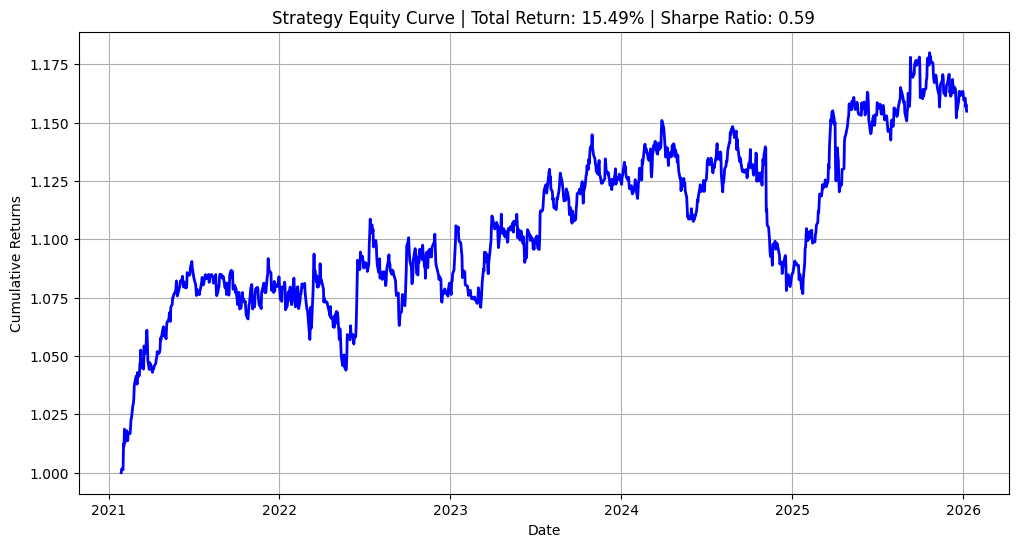

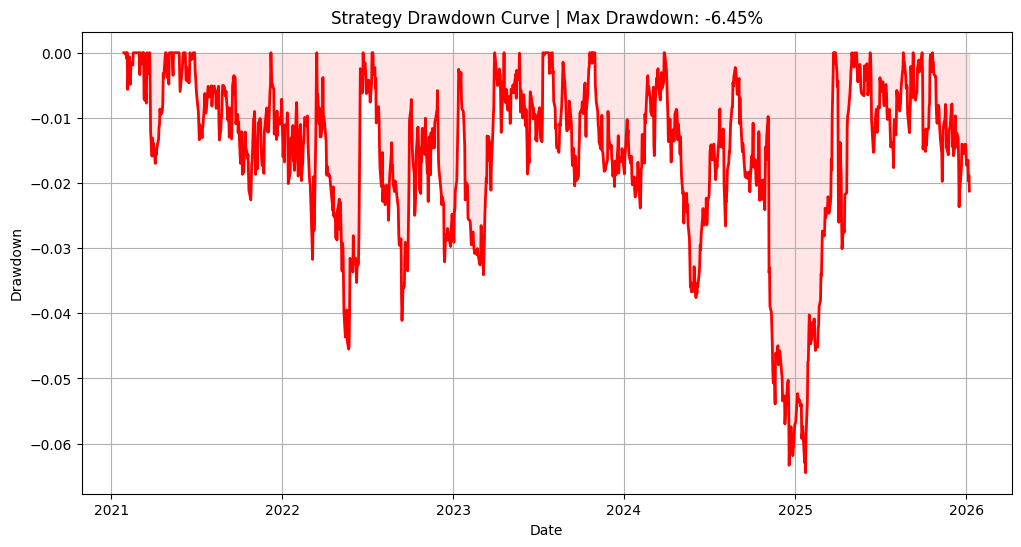

In [15]:
total_ret, sharpe, max_dd = performance_analysis(daily_cum_rets, daily_net_rets, plot_equity=True, plot_drawdown=True, show_stats=False)

In [16]:
# Monte Carlo Simulations for Risk Assessment

def monte_carlo(daily_net_rets, num_sims=1000, replacement=True, plot=False):
    # Actual cumulative returns
    actual_cum_rets = (1 + daily_net_rets).cumprod()
    num_days = len(daily_net_rets)

    # Vectorized bootstrap sampling
    if replacement:
        # Standard Bootstrap: Sample with replacement
        rets = np.random.choice(daily_net_rets, size=(num_days, num_sims), replace=replacement)
    else:
        # Permutation: Shuffle the existing returns for each simulation
        rets = np.array([np.random.permutation(daily_net_rets.values) for _ in range(num_sims)]).T

    # Vectorized cumulative returns
    cum_rets = np.cumprod(1 + rets, axis=0)

    # Convert to DataFrames for easier handling
    rets_df = pd.DataFrame(rets, index=daily_net_rets.index, columns=range(num_sims))
    cum_rets_df = pd.DataFrame(cum_rets, index=daily_net_rets.index, columns=range(num_sims))

    # Total returns for each simulation
    final_rets = cum_rets_df.iloc[-1] - 1

    # Plot the actual backtest cumulative returns to compare to simulations
    if plot:
        plt.figure(figsize=(12, 6))
        # Plot a subset of paths for performance and visibility
        plot_subset = cum_rets_df.iloc[:, :min(num_sims, 100)]
        plt.plot(plot_subset, color='gray', alpha=0.1)
        
        # Highlight the actual backtest
        plt.plot(actual_cum_rets, color='red', label='Actual Backtest')
        
        # # Add a "Median Path" for better statistical intuition
        # plt.plot(cum_rets_df.median(axis=1), color='blue', linestyle='--', label='Median Path')
        
        if replacement:
            plt.title(f"Monte Carlo: Bootstrap with Replacement ({num_sims} simulations)")
        else:
            plt.title(f"Monte Carlo: Bootstrap without Replacement ({num_sims} simulations)")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.show()

    return rets_df, cum_rets_df, final_rets

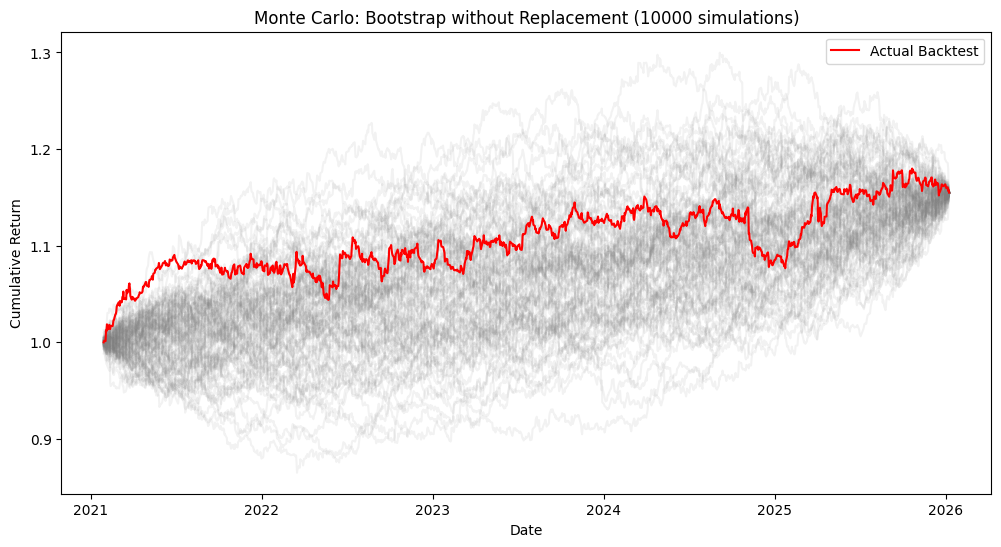

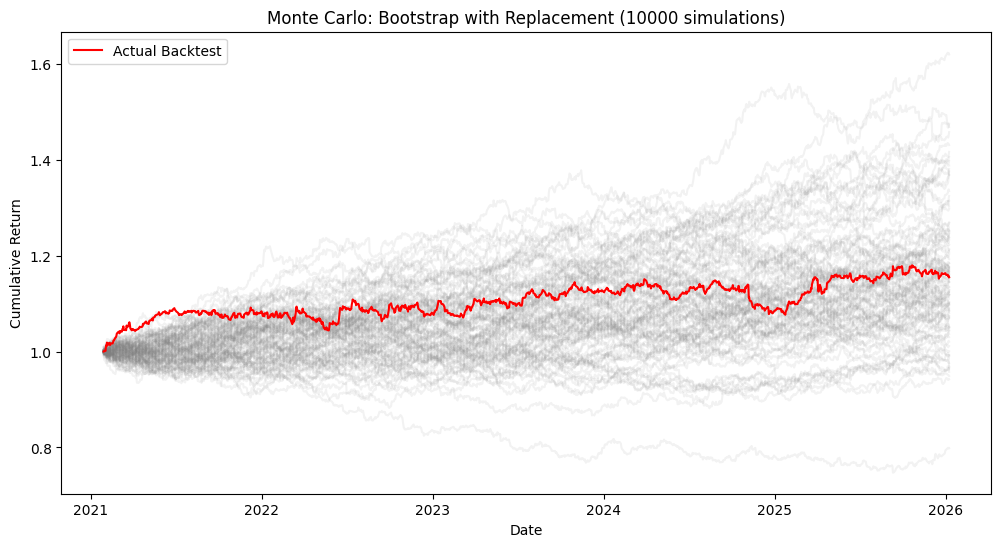

In [17]:
rets1_df, cum_rets1_df, final_rets1 = monte_carlo(daily_net_rets,
                                                   num_sims=10000,
                                                   replacement=False,
                                                   plot=True)

rets2_df, cum_rets2_df, final_rets2 = monte_carlo(daily_net_rets,
                                                   num_sims=10000,
                                                   replacement=True,
                                                   plot=True)

In [18]:
def visualize_performance(performance_df):

    # Assuming 'actual_stats' is a dictionary of your real backtest results
    # actual_stats = {'Total Return': 20.0, 'Sharpe Ratio': 0.8, 'Max Drawdown': -15.0}

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, col in enumerate(performance_df.columns):
        # Use 50 bins to ensure granularity without triggering the 'Too many bins' error
        sns.histplot(performance_df[col], kde=True, ax=axes[i], color='teal', bins=50)
        
        # Statistical markers
        axes[i].axvline(performance_df[col].mean(), color='blue', linestyle='--', label='Sim Mean')
        axes[i].axvline(performance_df[col].median(), color='black', linestyle='-', label='Sim Median')
        
        # Overlay actual backtest performance if available
        # axes[i].axvline(actual_stats[col], color='red', linewidth=2, label='Actual Backtest')
        
        axes[i].set_title(f'{col} Distribution')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

In [19]:
def performance_analysis(cum_rets, rets):
    # Total return
    total_ret = (cum_rets.iloc[-1] - 1) * 100

    # Sharpe ratio 
    sharpe_ratio = (rets.mean(axis=0) / rets.std(axis=0)) * np.sqrt(252)

    # Drawdown calculation
    running_max = cum_rets.cummax()
    drawdowns = (cum_rets / running_max) - 1
    max_dd = drawdowns.min(axis=0) * 100

    # Compile metrics
    metrics = pd.DataFrame({'Total Return': np.array(total_ret, ndmin=1),
                            'Sharpe Ratio': np.array(sharpe_ratio, ndmin=1),
                            'Max Drawdown': np.array(max_dd, ndmin=1)
                            })
    metrics = metrics.apply(pd.to_numeric, errors='coerce')

    # Statistical Summary
    stats_summary = metrics.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
    stats_summary['skew'] = metrics.skew()
    stats_summary['kurtosis'] = metrics.kurtosis()
    order = ['count', 'mean', 'std', 'min', 'max', '1%', '5%', 
                '25%', '50%', '75%', '95%', '99%', 'skew', 'kurtosis']
    stats_summary = stats_summary[order]

    # Print Detailed Stats
    report_type = "Monte Carlo" if type(total_ret) == pd.Series else "Single Strategy"
    print("="*40)
    print(f"STRATEGY PERFORMANCE REPORT ({report_type})")
    print("="*40)
    print(f"Mean Total Return:      {stats_summary.loc['Total Return', 'mean']:.2f}%")
    print(f"Mean Annualized Sharpe: {stats_summary.loc['Sharpe Ratio', 'mean']:.2f}")
    print(f"Mean Max Drawdown:      {stats_summary.loc['Max Drawdown', 'mean']:.2f}%")
    print("="*40)

    return metrics, stats_summary

In [20]:
rets1_df, cum_rets1_df

daily_cum_rets, daily_net_rets

(Date
 2021-01-28         1.0
 2021-01-29    1.001603
 2021-02-01     1.00131
 2021-02-02    1.012359
 2021-02-03    1.011425
                 ...   
 2026-01-02    1.159551
 2026-01-05    1.160448
 2026-01-06     1.15675
 2026-01-07    1.157737
 2026-01-08    1.154881
 Length: 1243, dtype: object,
 Date
 2021-01-28         0.0
 2021-01-29    0.001603
 2021-02-01   -0.000293
 2021-02-02    0.011035
 2021-02-03   -0.000922
                 ...   
 2026-01-02   -0.003277
 2026-01-05    0.000774
 2026-01-06   -0.003187
 2026-01-07    0.000853
 2026-01-08   -0.002467
 Length: 1243, dtype: object)

In [21]:
metrics, stats_summary = performance_analysis(cum_rets=cum_rets1_df,
                                          rets=rets1_df)

STRATEGY PERFORMANCE REPORT (Monte Carlo)
Mean Total Return:      15.49%
Mean Annualized Sharpe: 0.59
Mean Max Drawdown:      -8.48%


In [22]:
stats_summary

,count,mean,std,min,max,1%,5%,25%,50%,75%,95%,99%,skew,kurtosis
Total Return,10000.0,15.488119,2.294061e-13,15.488119,15.488119,15.488119,15.488119,15.488119,15.488119,15.488119,15.488119,15.488119,0.000000,0.000000
Sharpe Ratio,10000.0,0.593495,5.833043e-16,0.593495,0.593495,0.593495,0.593495,0.593495,0.593495,0.593495,0.593495,0.593495,0.000000,0.000000
Max Drawdown,10000.0,-8.480760,2.136939e+00,-20.673024,-4.044613,-14.628389,-12.459152,-9.733652,-8.140009,-6.893614,-5.626585,-4.934144,-0.816014,0.702438
